# Objective: Perform EDA on IPL dataset and decide which team and player should a company sponsor.
## Project submitted by: Sachin Shastri


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)
%matplotlib inline
import squarify

In [2]:
ipl=pd.read_csv('/Users/ankitshastri/Downloads/ipl/matches.csv')

In [74]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [243]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [244]:
ipl.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [245]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [246]:
ipl.nunique()

id                 756
season              12
city                32
date               546
team1               15
team2               15
toss_winner         15
toss_decision        2
result               3
dl_applied           2
winner              15
win_by_runs         89
win_by_wickets      11
player_of_match    226
venue               41
umpire1             61
umpire2             65
umpire3             25
dtype: int64

In [247]:
ipl.loc[(ipl['team1'] == 'Delhi Daredevils','team1')] = 'Delhi Capitals'
ipl.loc[(ipl['team2'] == 'Delhi Daredevils','team2')] = 'Delhi Capitals'
ipl.loc[(ipl['winner'] == 'Delhi Daredevils','winner')] = 'Delhi Capitals'

In [248]:
ipl.loc[(ipl['team1'] == 'Deccan Chargers','team1')] = 'Sunrisers Hyderabad'
ipl.loc[(ipl['team2'] == 'Deccan Chargers','team2')] = 'Sunrisers Hyderabad'
ipl.loc[(ipl['winner'] == 'Deccan Chargers','winner')] = 'Sunrisers Hyderabad'

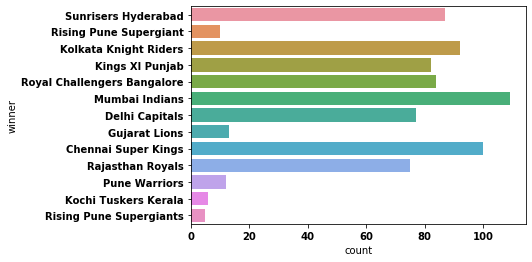

In [249]:
sns.countplot(y='winner',data=ipl);

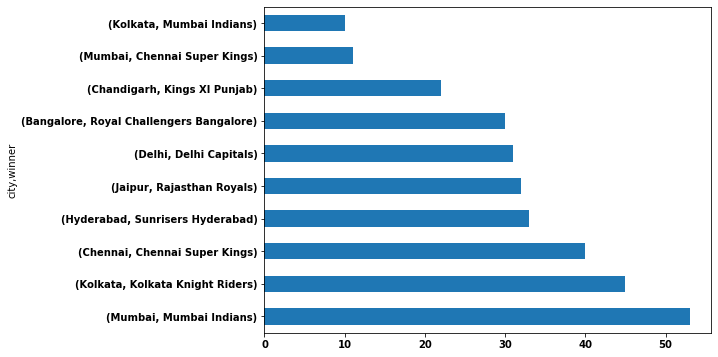

In [250]:
(ipl.groupby('city')['winner'].value_counts().sort_values(ascending=False).head(10)).plot(kind='barh',figsize=(8,6))

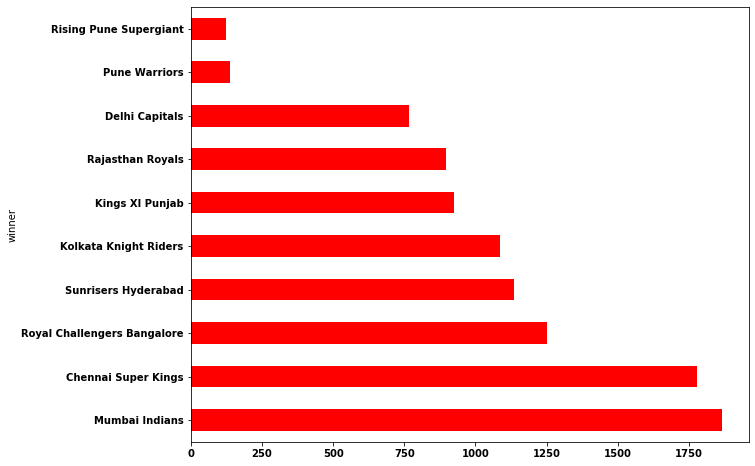

In [251]:
ipl.groupby('winner')['win_by_runs'].sum().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                     figsize=(10,8),color='red')

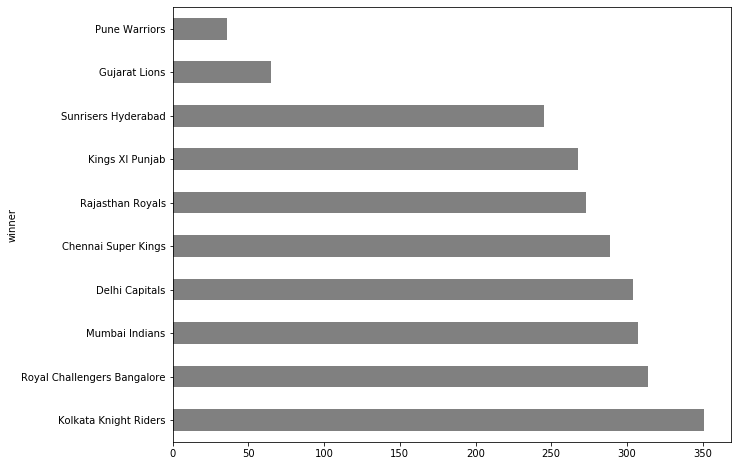

In [75]:
ipl.groupby('winner')['win_by_wickets'].sum().sort_values(ascending=False).head(10).plot(kind='barh',
                                                                                     figsize=(10,8),color='grey')

## Number of matches played by each team:

In [57]:
ipl_mi=pd.DataFrame(ipl[(ipl.team1 == 'Mumbai Indians') | (ipl.team2 == 'Mumbai Indians')])
print('Number of matches played: ', ipl_mi.shape[0])
m_mi=ipl_mi.shape[0] #Store the number of matches played by Mumbai Indians in a variable
ipl_mi.winner.value_counts()

Number of matches played:  187


Mumbai Indians                 109
Delhi Capitals                  12
Chennai Super Kings             11
Sunrisers Hyderabad             11
Kings XI Punjab                 11
Rajasthan Royals                10
Royal Challengers Bangalore      9
Kolkata Knight Riders            6
Rising Pune Supergiant           3
Gujarat Lions                    2
Rising Pune Supergiants          1
Kochi Tuskers Kerala             1
Pune Warriors                    1
Name: winner, dtype: int64

In [56]:
ipl_kkr=pd.DataFrame(ipl[(ipl.team1 == 'Kolkata Knight Riders') | (ipl.team2 == 'Kolkata Knight Riders')])
print('Number of matches played: ', ipl_kkr.shape[0])
m_kkr=ipl_kkr.shape[0]
ipl_kkr.winner.value_counts()

Number of matches played:  178


Kolkata Knight Riders          92
Mumbai Indians                 19
Chennai Super Kings            13
Royal Challengers Bangalore    10
Rajasthan Royals               10
Delhi Capitals                 10
Sunrisers Hyderabad             9
Kings XI Punjab                 8
Gujarat Lions                   3
Kochi Tuskers Kerala            2
Rising Pune Supergiant          1
Pune Warriors                   1
Name: winner, dtype: int64

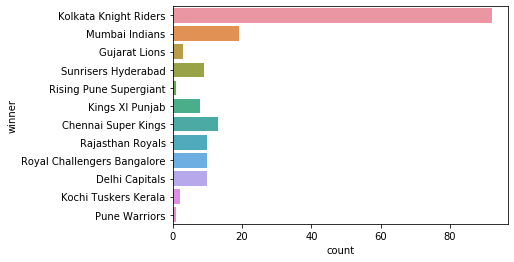

In [17]:
sns.countplot(y='winner',data=ipl_kkr);

In [55]:
ipl_k11=pd.DataFrame(ipl[(ipl.team1 == 'Kings XI Punjab') | (ipl.team2 == 'Kings XI Punjab')])
print('Number of matches played: ', ipl_k11.shape[0])
m_k11=ipl_k11.shape[0]
ipl_k11.winner.value_counts()

Number of matches played:  176


Kings XI Punjab                82
Kolkata Knight Riders          17
Sunrisers Hyderabad            13
Mumbai Indians                 13
Royal Challengers Bangalore    12
Chennai Super Kings            12
Rajasthan Royals               10
Delhi Capitals                 10
Pune Warriors                   3
Gujarat Lions                   2
Rising Pune Supergiants         1
Rising Pune Supergiant          1
Name: winner, dtype: int64

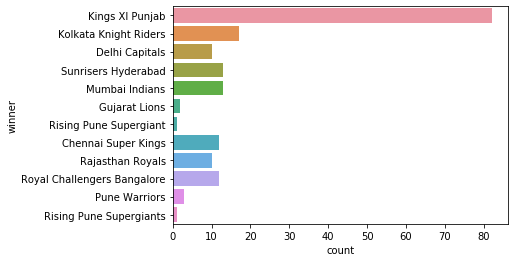

In [19]:
sns.countplot(y='winner',data=ipl_k11);

In [58]:
ipl_csk=pd.DataFrame(ipl[(ipl.team1 == 'Chennai Super Kings') | (ipl.team2 == 'Chennai Super Kings')])
print('Number of matches played: ', ipl_csk.shape[0])
m_csk=ipl_csk.shape[0]
ipl_csk.winner.value_counts()

Number of matches played:  164


Chennai Super Kings            100
Mumbai Indians                  17
Kings XI Punjab                  9
Royal Challengers Bangalore      8
Sunrisers Hyderabad              7
Rajasthan Royals                 7
Kolkata Knight Riders            7
Delhi Capitals                   6
Pune Warriors                    2
Kochi Tuskers Kerala             1
Name: winner, dtype: int64

In [59]:
ipl_rcb=pd.DataFrame(ipl[(ipl.team1 == 'Royal Challengers Bangalore') | (ipl.team2 == 'Royal Challengers Bangalore')])
print('Number of matches played: ', ipl_rcb.shape[0])
m_rcb=ipl_rcb.shape[0]
ipl_rcb.winner.value_counts()

Number of matches played:  180


Royal Challengers Bangalore    84
Mumbai Indians                 16
Chennai Super Kings            15
Kolkata Knight Riders          14
Sunrisers Hyderabad            14
Kings XI Punjab                12
Rajasthan Royals               10
Delhi Capitals                  8
Rising Pune Supergiant          2
Gujarat Lions                   2
Name: winner, dtype: int64

In [60]:
ipl_dc=pd.DataFrame(ipl[(ipl.team1 == 'Delhi Capitals') | (ipl.team2 == 'Delhi Capitals')])
print('Number of matches played: ', ipl_dc.shape[0])
m_dc=ipl_dc.shape[0]
ipl_dc.winner.value_counts()

Number of matches played:  177


Delhi Capitals                 77
Chennai Super Kings            15
Royal Challengers Bangalore    14
Kings XI Punjab                14
Kolkata Knight Riders          13
Sunrisers Hyderabad            13
Mumbai Indians                 12
Rajasthan Royals               11
Rising Pune Supergiants         2
Pune Warriors                   2
Kochi Tuskers Kerala            1
Gujarat Lions                   1
Name: winner, dtype: int64

In [61]:
ipl_srh=pd.DataFrame(ipl[(ipl.team1 == 'Sunrisers Hyderabad') | (ipl.team2 == 'Sunrisers Hyderabad')])
print('Number of matches played: ', ipl_srh.shape[0])
m_srh=ipl_srh.shape[0]
ipl_srh.winner.value_counts()

Number of matches played:  183


Sunrisers Hyderabad            87
Kolkata Knight Riders          17
Chennai Super Kings            15
Delhi Capitals                 13
Mumbai Indians                 13
Rajasthan Royals               12
Royal Challengers Bangalore    11
Kings XI Punjab                11
Rising Pune Supergiant          2
Rising Pune Supergiants         1
Pune Warriors                   1
Name: winner, dtype: int64

In [62]:
ipl_rr=pd.DataFrame(ipl[(ipl.team1 == 'Rajasthan Royals') | (ipl.team2 == 'Rajasthan Royals')])
print('Number of matches played: ', ipl_rr.shape[0])
m_rr=ipl_rr.shape[0]
ipl_rr.winner.value_counts()

Number of matches played:  147


Rajasthan Royals               75
Chennai Super Kings            14
Kolkata Knight Riders          10
Mumbai Indians                 10
Delhi Capitals                  9
Kings XI Punjab                 9
Royal Challengers Bangalore     8
Sunrisers Hyderabad             8
Kochi Tuskers Kerala            1
Pune Warriors                   1
Name: winner, dtype: int64

## Wins as a propotion of total matches played: 

In [33]:
def win_prop(i,j): #define a function to calculate win propotions of each team
    y=i.shape[0]
    x=(i.winner==j).sum()
    win=x/y
    return win

In [46]:
win_srh=win_prop(ipl_srh,'Sunrisers Hyderabad')
win_k11=win_prop(ipl_k11,'Kings XI Punjab')
win_kkr=win_prop(ipl_kkr,'Kolkata Knight Riders')
win_csk=win_prop(ipl_csk,'Chennai Super Kings')
win_mi=win_prop(ipl_mi,'Mumbai Indians')
win_dc= win_prop(ipl_dc,'Delhi Capitals')
win_rr=win_prop(ipl_rr,'Rajasthan Royals')
win_rcb=win_prop(ipl_rcb,'Royal Challengers Bangalore')

In [72]:
wins={'Team':['Sunrisers Hyderabad','Kings XI Punjab','Kolkata Knight Riders','Chennai Super King',
             'Mumbai Indians','Delhi Capitals','Rajasthan Royals','Royal Challengers Bangalore'],
     'Matches played':[m_srh,m_k11,m_kkr,m_csk,m_mi,m_dc,m_rr,m_rcb],
      'Win Propotion':[win_srh,win_k11,win_kkr,win_csk,win_mi,win_dc,win_rr,win_rcb]}
win_df=pd.DataFrame(wins,columns=['Team','Matches played','Win Propotion'])
win_df['Win Propotion']=win_df['Win Propotion']*200

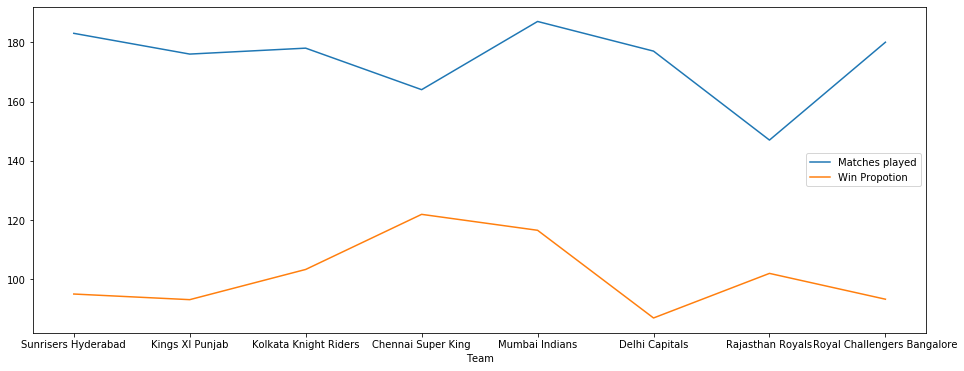

In [73]:
df_plot = win_df.set_index('Team')
lines = df_plot.plot.line(figsize=(16,6))

## Observations:
### 1- Mumbai Indians have played the maximum number of matches, followed by Sun Risers Hyderabad.
### 2- Mumbai Indians have won highest number of matches of all the teams.
### 3- Mumbai Indians have won their matches with largest run margin.
### 4- Win propotion of Chennai Super Kings is highest, followed by Mumbai Indians.
### 5- Mumbai Indians have won maximum number of matches of all the teams at their respective home turf.
### 6- Kolkata Knight Riders have won with highest cumulative number of wickets.

## Looking at all these factors, Mumbai Indians is recommended to the sponsors to ensure wider and larger visibility of their brand.

# Player stats:

In [4]:
ipl_d=pd.read_csv('/Users/ankitshastri/Downloads/ipl/deliveries.csv')

In [5]:
ipl_d.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
ipl_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [79]:
ipl['player_of_match'].value_counts().sort_values(ascending=False).head(10)

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

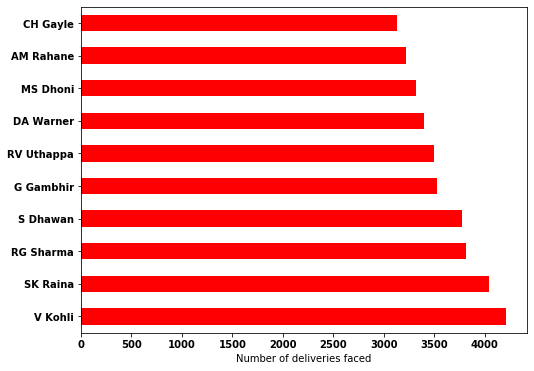

In [124]:
#Number of deliveries faced:

ipl_d['batsman'].value_counts().head(10).plot(kind='barh',figsize=(8,6),color='red');
plt.xlabel('Number of deliveries faced')
no_deliveries=ipl_d['batsman'].value_counts()

In [12]:
#Runs Scored by batsmen
a = ((ipl_d.groupby('batsman')[['batsman_runs']].sum()).sort_values(by='batsman_runs',ascending=False)).head(20).index.get_level_values(0).tolist()
print(a) #print labels


['V Kohli', 'SK Raina', 'RG Sharma', 'DA Warner', 'S Dhawan', 'CH Gayle', 'MS Dhoni', 'RV Uthappa', 'AB de Villiers', 'G Gambhir', 'AM Rahane', 'KD Karthik', 'SR Watson', 'AT Rayudu', 'YK Pathan', 'BB McCullum', 'PA Patel', 'MK Pandey', 'KA Pollard', 'Yuvraj Singh']


In [14]:
d = (ipl_d.groupby('batsman')[['batsman_runs']].sum()).sort_values(by='batsman_runs',ascending=False).head(20).reset_index().batsman_runs.values.tolist()
print(d) #print values

[5434, 5415, 4914, 4741, 4632, 4560, 4477, 4446, 4428, 4223, 3850, 3688, 3614, 3326, 3241, 2893, 2874, 2872, 2784, 2765]


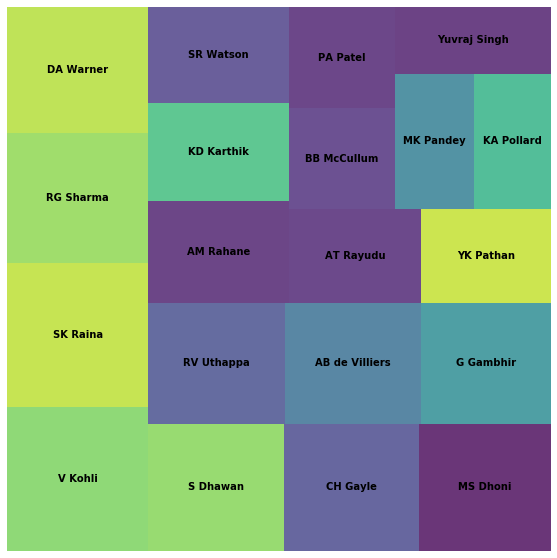

In [17]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, aspect="equal")
squarify.plot(sizes=d, label=a, ax=ax,alpha=.8)
plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [58]:
runs_batsman=ipl_d.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False) 
#store the runs scored by batsmen in a list.

In [ ]:
#Virat Kohli has scored highest runs.

### SELECT ONLY BATSMEN WITH MORE THAN 1000 RUNS 

In [74]:
rb_1000=runs_batsman[runs_batsman>1000]
bats_1000=rb_1000.index
bats_1000
len(bats_1000)

70

In [117]:
out=ipl_d.player_dismissed.value_counts().dropna()
out = out[bats_1000]
out

batsman
LMP Simmons       27
KP Pietersen      28
ML Hayden         31
AS Yadav          32
KS Williamson     34
                ... 
S Dhawan         137
V Kohli          143
RV Uthappa       153
RG Sharma        155
SK Raina         162
Name: player_dismissed, Length: 70, dtype: int64

Text(0.5, 0, 'Innings')

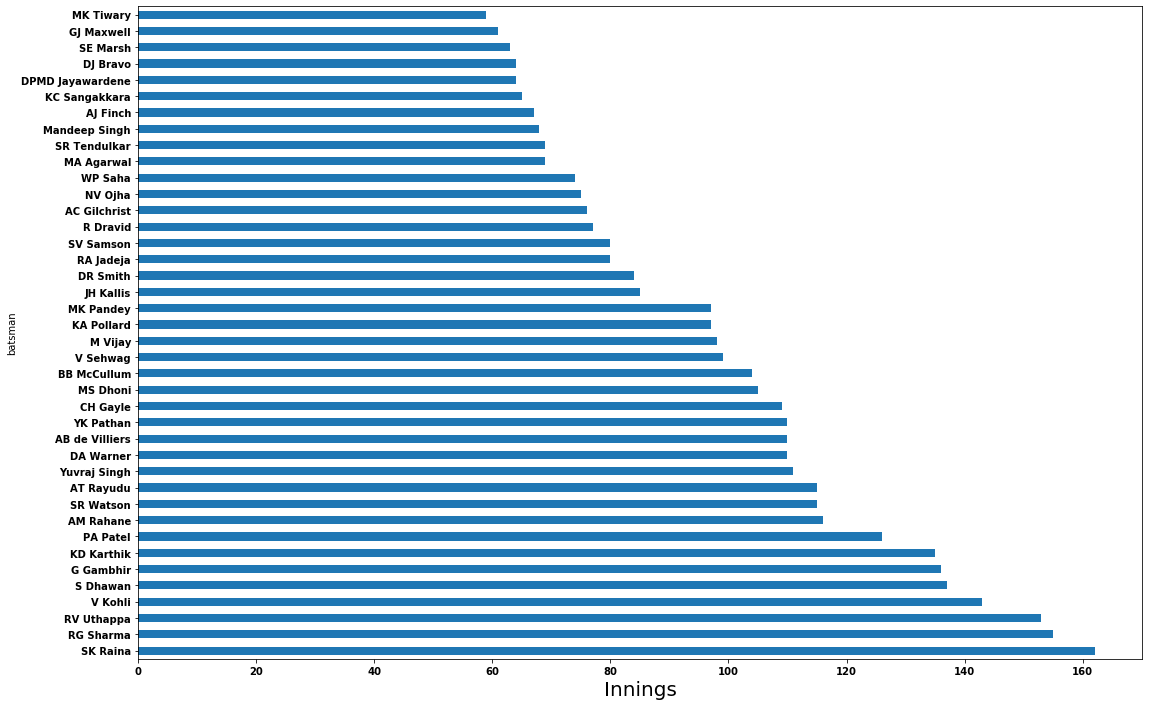

In [132]:
#Number of innings = Number of dismissals
out.sort_values(ascending=False).head(40).plot(kind='barh',figsize=(18,12))
plt.xlabel('Innings',Fontsize=20)

### Average of batsmen

Text(0.5, 0, 'Average')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


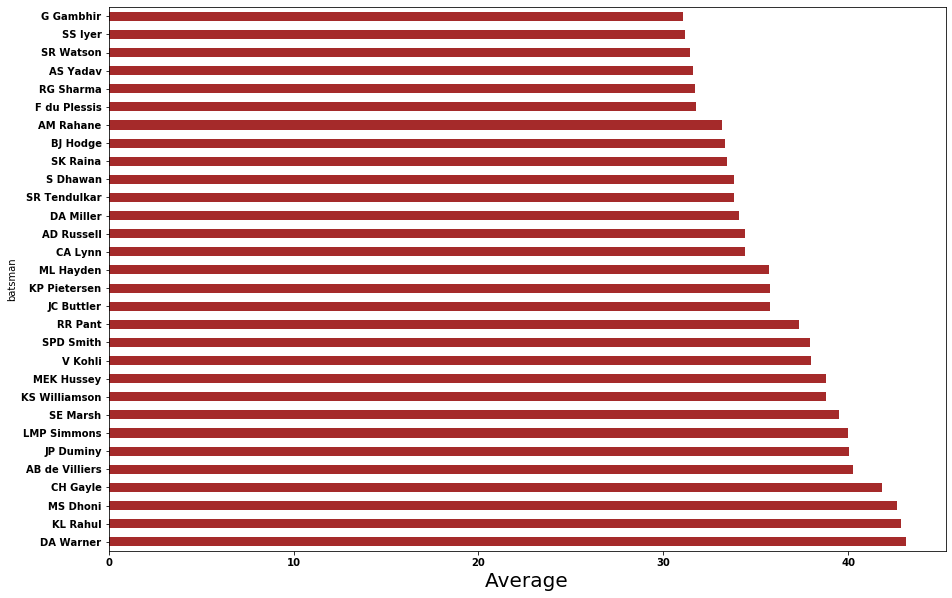

In [128]:

avg_bat=runs_batsman/out
avg_bat=avg_bat.dropna()
avg_bat.sort_values(ascending=False).head(30).plot(kind='barh',figsize=(15,10),color='brown')
plt.xlabel('Average',Fontsize=20)

In [25]:
#Chris Gayle averages higher than Virat Kohli

### Strike Rate

Text(0.5, 0, 'Strike Rate')

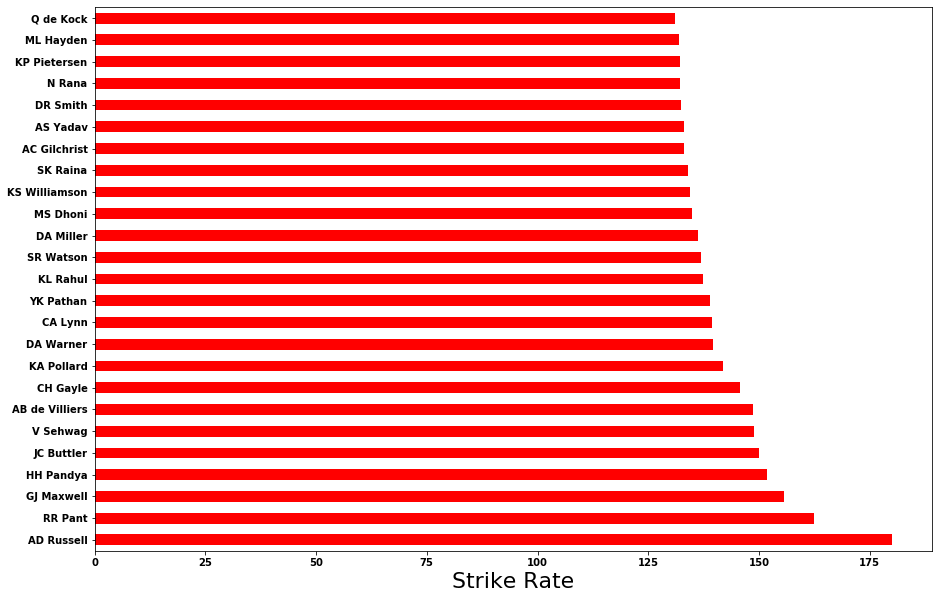

In [130]:
str_rate=(rb_1000/no_deliveries)*100
str_rate.sort_values(ascending=False).head(25).plot(kind='barh',figsize=(15,10),color='red');
plt.xlabel('Strike Rate',fontsize=22)

In [ ]:
#Chris Gayle has higher strike rate than Virat Kohli

### Super over stats: 

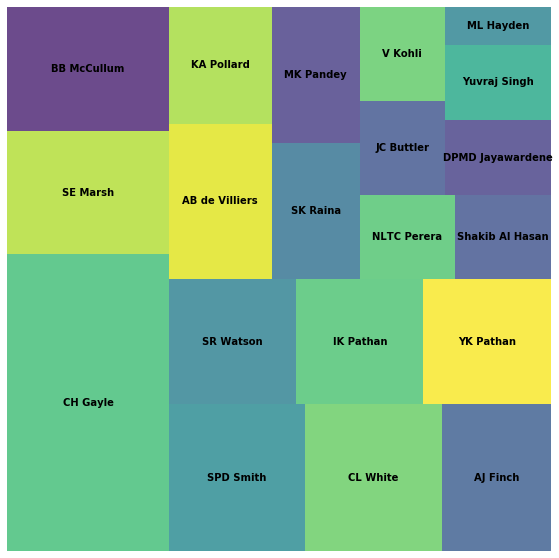

In [126]:
a = ((ipl_d.groupby('batsman')[['is_super_over']].sum()).sort_values(by='is_super_over',ascending=False)).head(20).index.get_level_values(0).tolist()
d = (ipl_d.groupby('batsman')[['is_super_over']].sum()).sort_values(by='is_super_over',ascending=False).head(20).reset_index().is_super_over.values.tolist()
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, aspect="equal")
squarify.plot(sizes=d, label=a, ax=ax,alpha=.8)
plt.axis('off')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
#Chris Gayle has faced maximum deliveries in super overs.

## Boundaries 

Text(0.5, 0, 'Number of fours hit')

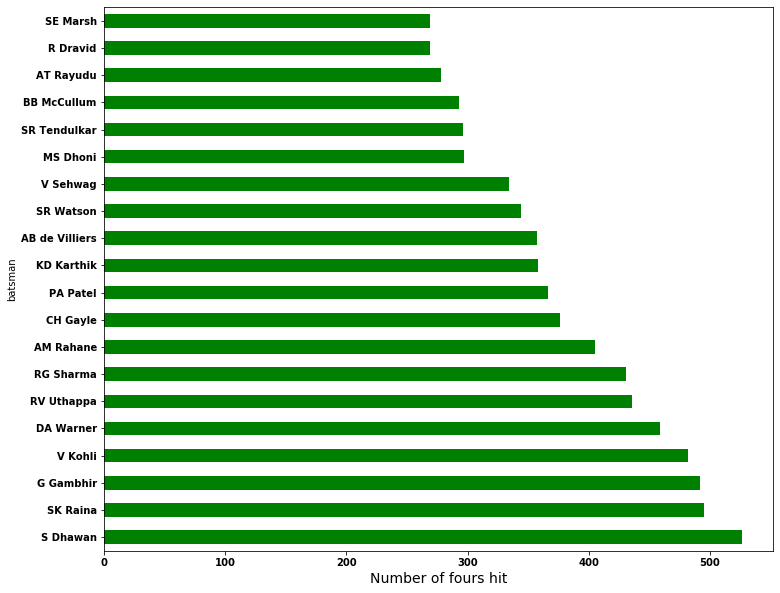

In [183]:
ipl_fours=pd.DataFrame(ipl_d[(ipl_d.batsman_runs == 4)]) #number of fours
bats_4=ipl_fours.groupby('batsman')['batsman_runs'].sum()/4
bats_4=bats_4[bats_1000].sort_values(ascending=False).head(20).plot(kind='barh',figsize=(12,10),color='green');
plt.xlabel('Number of fours hit',fontsize=14)

Text(0.5, 0, 'Number of sixes hit')

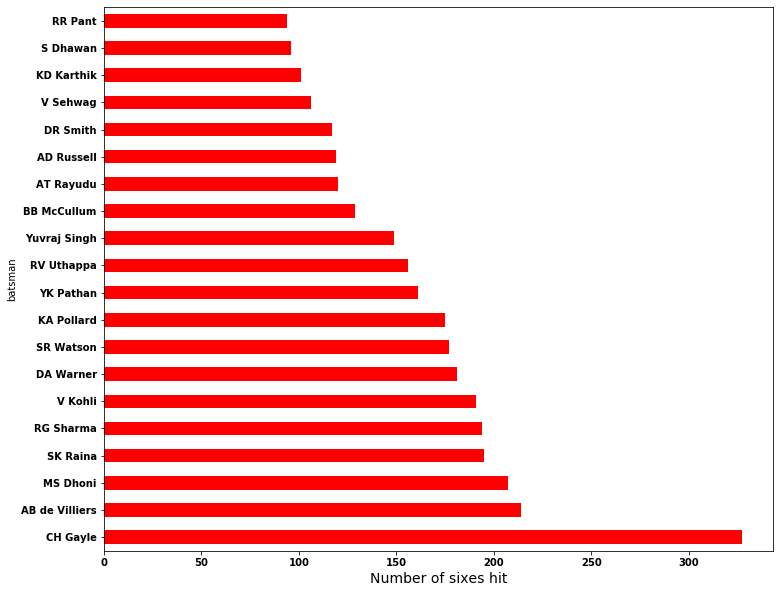

In [182]:
bats_sixes=pd.DataFrame(ipl_d[(ipl_d.batsman_runs == 6)]) #number of sixes hit
bats_6=bats_sixes.groupby('batsman')['batsman_runs'].sum()/6

bats_6=bats_6[bats_1000].sort_values(ascending=False).head(20).plot(kind='barh',figsize=(12,10),color='red');
plt.xlabel('Number of sixes hit',fontsize=14)

## Observations:
### Virat Kohli has scored highest runs.
### Virat Kohli has faced maximum deliveries.
### Virat Kohli is amongst top 4 in terms of total innings played.
### He also has average amongst top 11 players.
### Chris Gayle has higher average than Virat Kohli
### He also has strike rate higher than Kohli
### Chris Gayle has played maximum number of deliveries in super overs.
### Virat Kohli has more number of fours, while Chris Gayle has more number of sixes.
### Considering the visibility factor and impactful performance, Chris Gayle is recommended for sponsors.

## Bowler stats

In [136]:
#Number of overs bowled 
overs_bowler=ipl_d['bowler'].value_counts()/6                                                               
overs_bowler = overs_bowler[overs_bowler > 100] #Minimum 25 matches played or 100 overs bowled
bowl_100=overs_bowler.index
overs_bowler=overs_bowler[bowl_100]
overs_bowler

Harbhajan Singh    575.166667
A Mishra           528.666667
PP Chawla          526.166667
R Ashwin           502.666667
SL Malinga         495.666667
                      ...    
AJ Tye             103.000000
BA Stokes          102.500000
MA Starc           102.000000
STR Binny          102.000000
WD Parnell         100.166667
Name: bowler, Length: 90, dtype: float64

Text(0.5, 0, 'Number of overs')

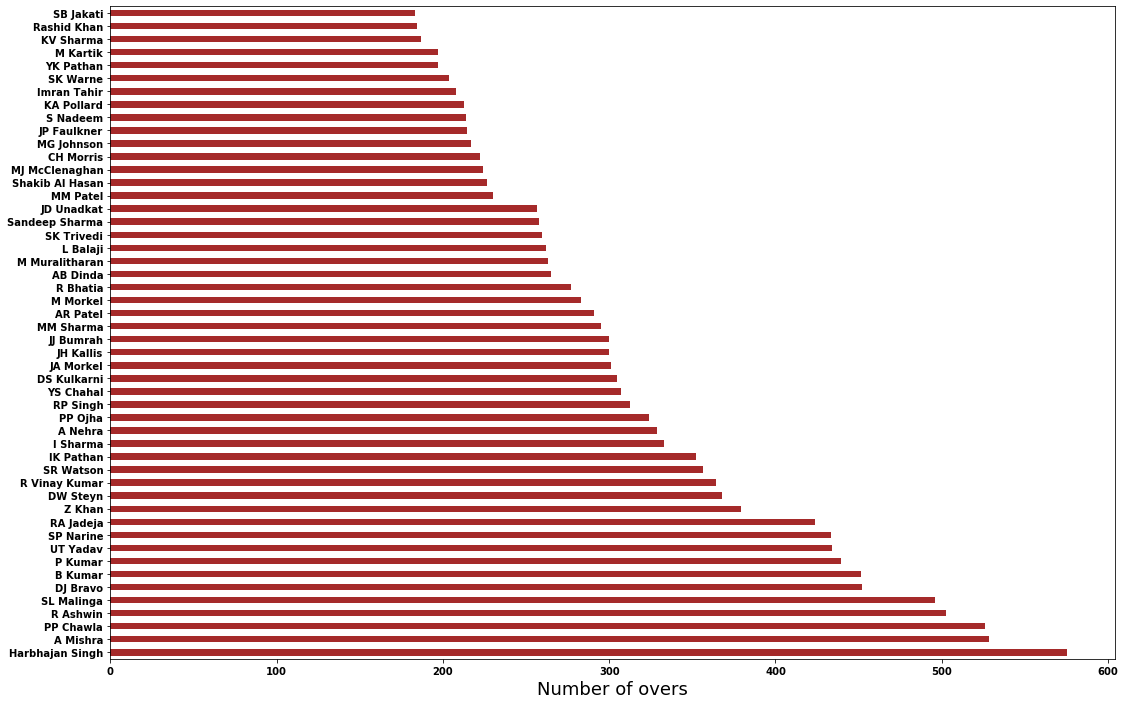

In [137]:
overs_bowler.head(50).plot(kind='barh',figsize=(18,12),color='brown')
plt.xlabel('Number of overs',fontsize=18)

In [206]:
#Though Amit Mishra, PP Chawla, R Ashwin & DJ Bravo have bowled higest number of overs.
#While J Bumrah has bowled just more than 300 overs, Rashid Khan has bowled less than 200 overs.

### Wickets

In [139]:
ipl_db=ipl_d[ipl_d.dismissal_kind!='run out'] #create a dataset by dropping run out dismissals

In [9]:
ipl_db.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [140]:
ipl_db=ipl_db.dropna()

Text(0.5, 0, 'Wickets')

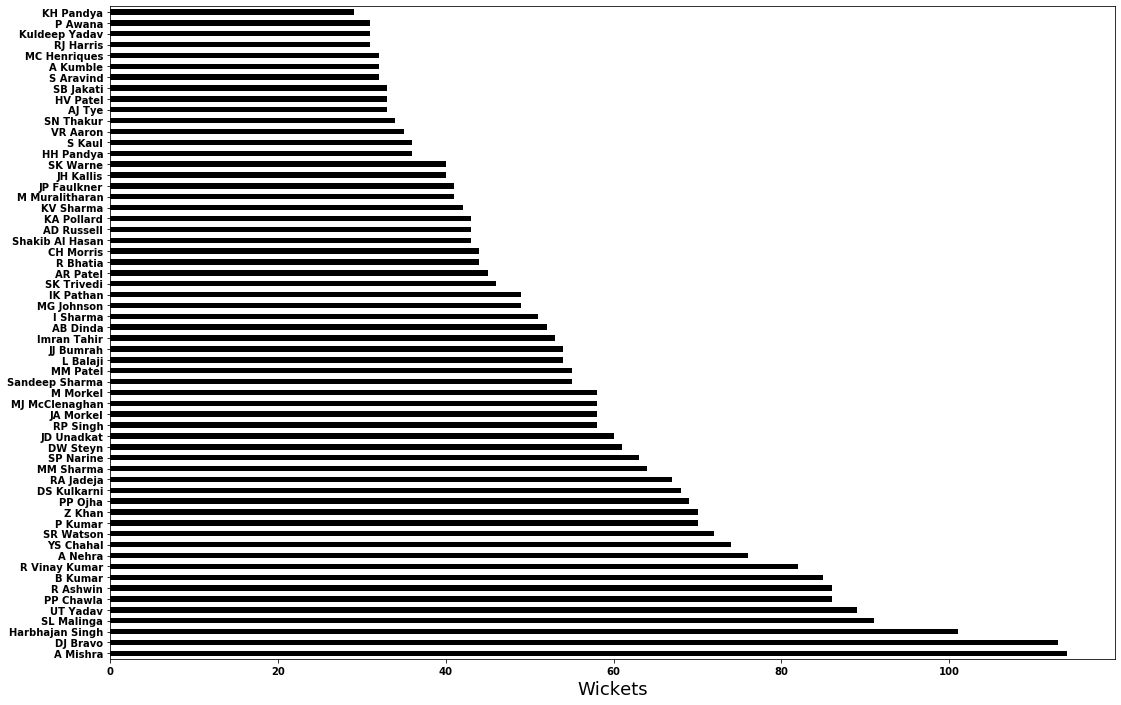

In [219]:
wickets=ipl_db['bowler'].value_counts()
wickets=wickets[bowl_100]
wickets.sort_values(ascending=False).head(60).plot(kind='barh',figsize=(18,12),color='black');
plt.xlabel('Wickets',fontsize=18)                                       

In [207]:
#Though Amit Mishra, PP Chawla, R Ashwin & DJ Bravo have bowled higest number of overs.
#While J Bumrah has bowled just more than 300 overs, Rashid Khan has bowled less than 200 overs.
#Amit Mishra, DJ Bravo, PP Chawla & R Ashwin have taken highest wickets amongst current players.
# J BUmrah has higher number of wickets than Rashid Khan

Text(0.5, 0, 'Number of deliveries in super over')

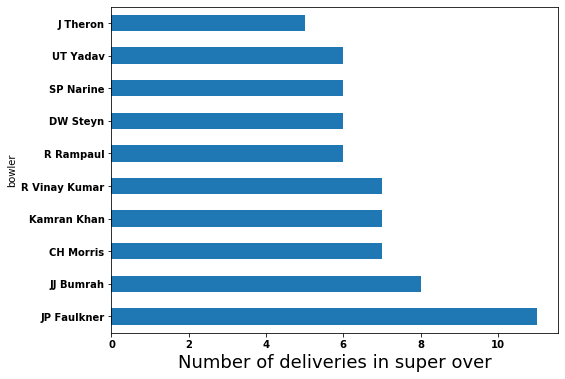

In [112]:
#Number of deliveries bowled by a bowler in super over
(ipl_d.groupby('bowler')['is_super_over'].sum()).sort_values(ascending=False).head(10).plot(kind='barh'
                                                                                           ,figsize=(8,6))
plt.xlabel('Number of deliveries in super over',fontsize=18)

In [208]:
#J Bumrah has bowled one of the highest number of deliveries in super over

Text(0.5, 0, 'Runs Conceded')

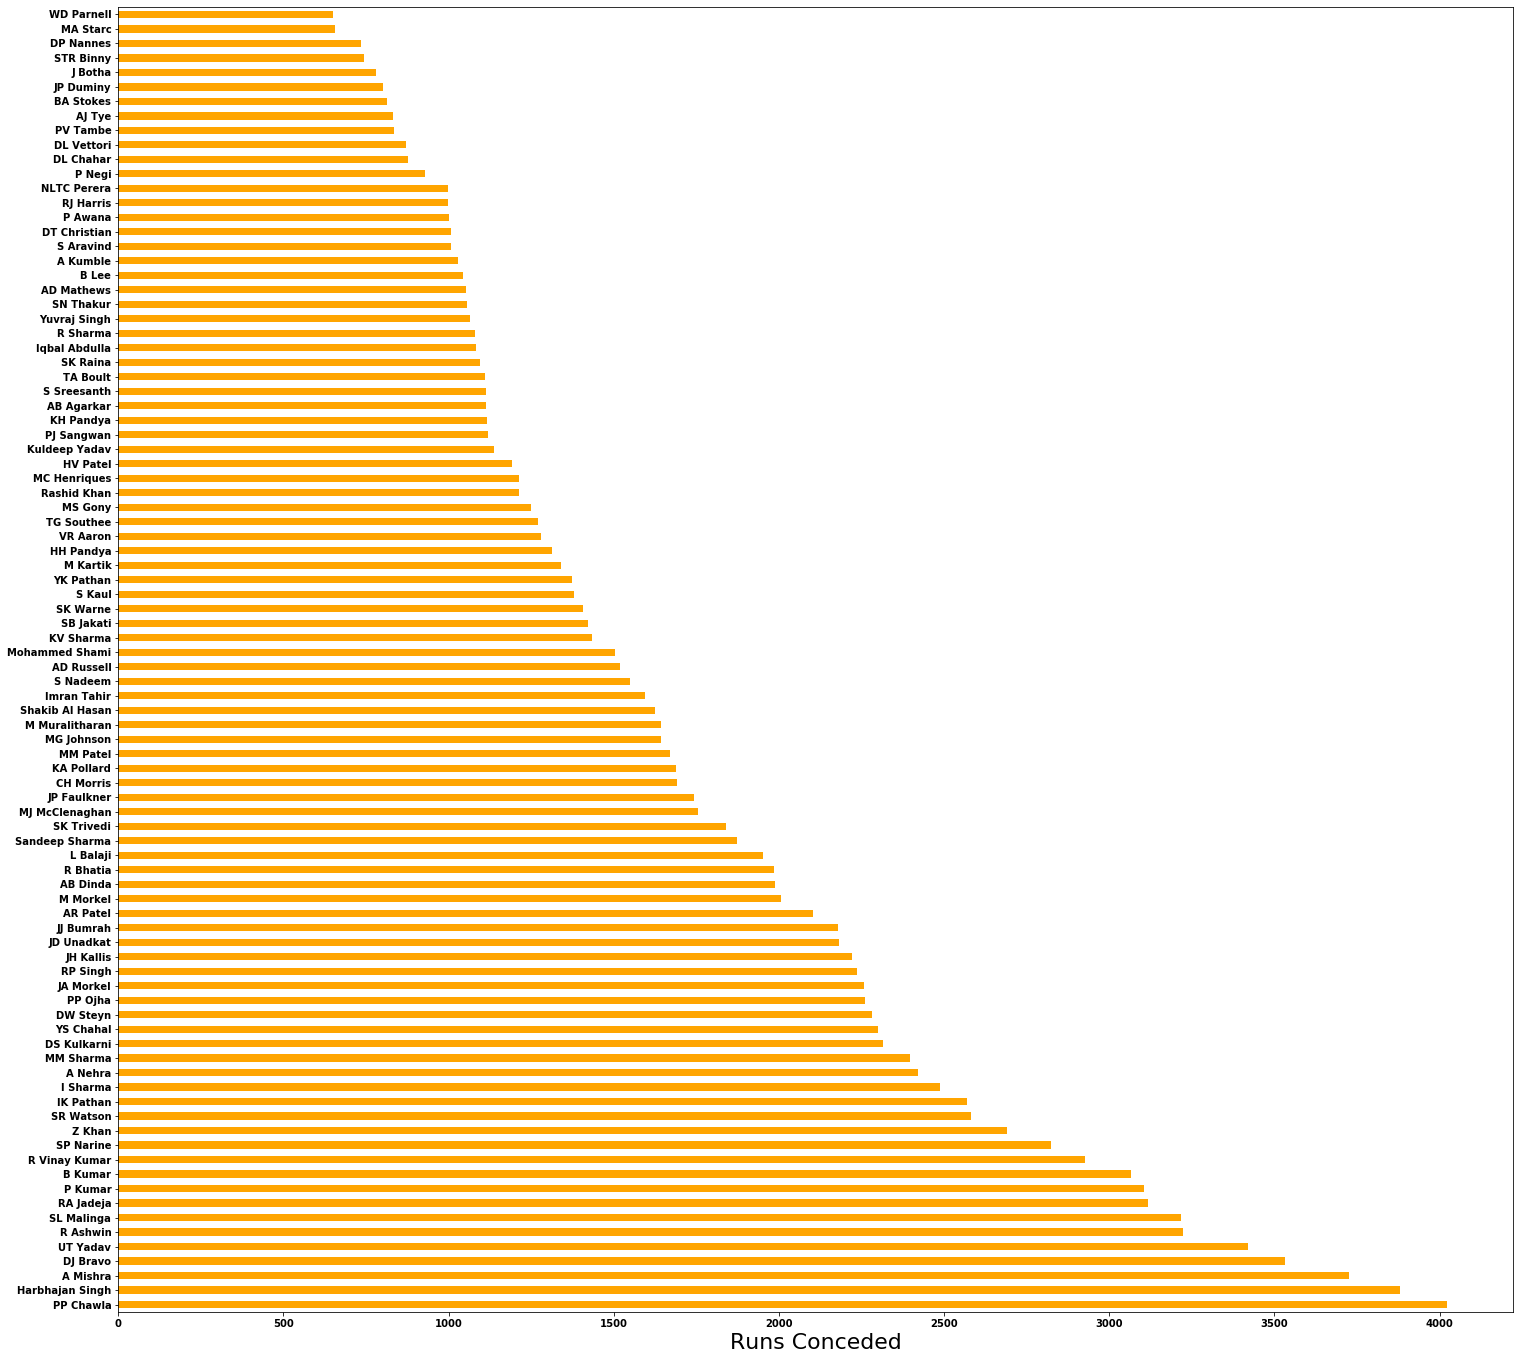

In [222]:
#Runs Conceded by bowler
runs_b=ipl_d.groupby('bowler')['batsman_runs'].sum()

runs_b=runs_b[bowl_100]
runs_b.sort_values(ascending=False).plot(kind='barh',color='orange',figsize=(25,24))

plt.xlabel('Runs Conceded',fontsize=22)

In [213]:
# P Chawla, A Mishra & R Ashwin have conceded some of the highst runs.
# While R Khan has conceded less runs than Bumrah

In [146]:
econ=runs_b/overs_bowler #economy of a bowler
econ = econ[(econ >1)& (econ<10)]

Text(0.5, 0, 'Economy')

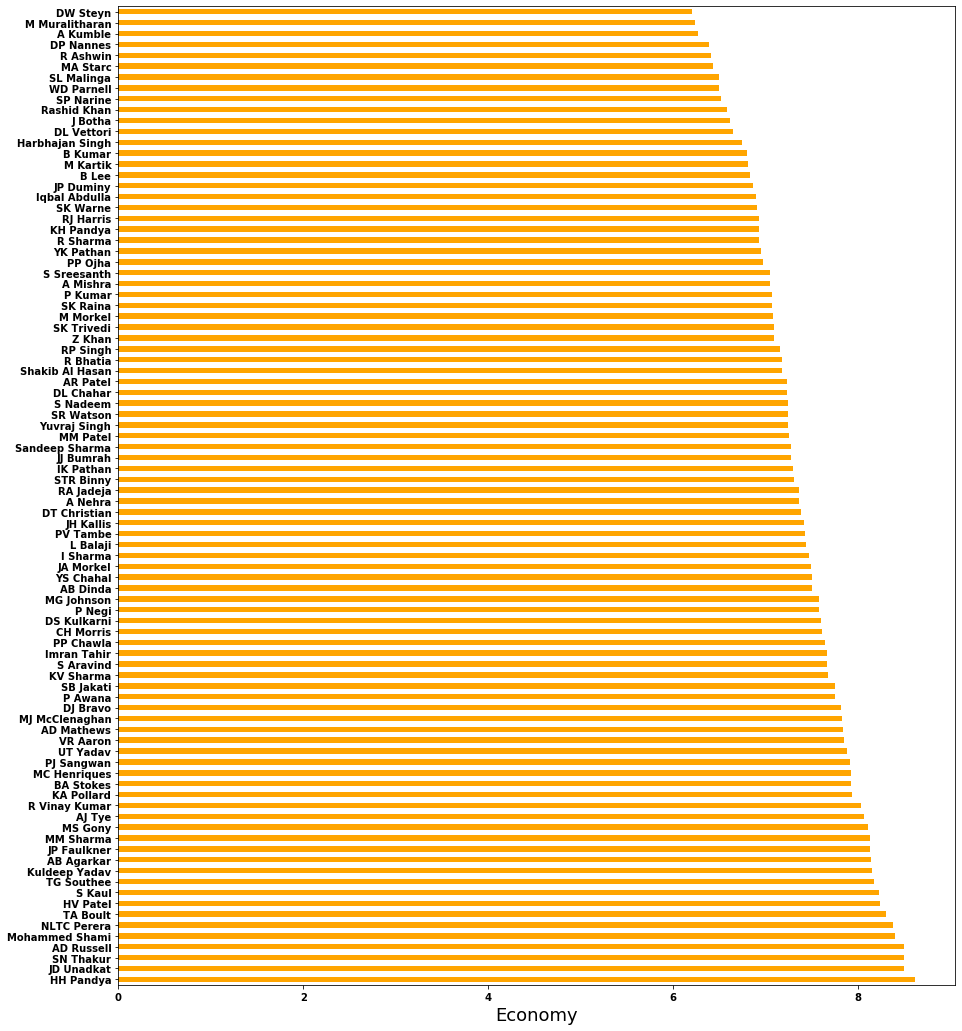

In [215]:
econ.sort_values(ascending=False).plot(kind='barh',color='orange',figsize=(15,18));
plt.xlabel('Economy',fontsize=18)

In [216]:
#Economy of rashid Khan is least amingst all the considered options

### Bowler Average 

Text(0.5, 0, 'Bowler Average')

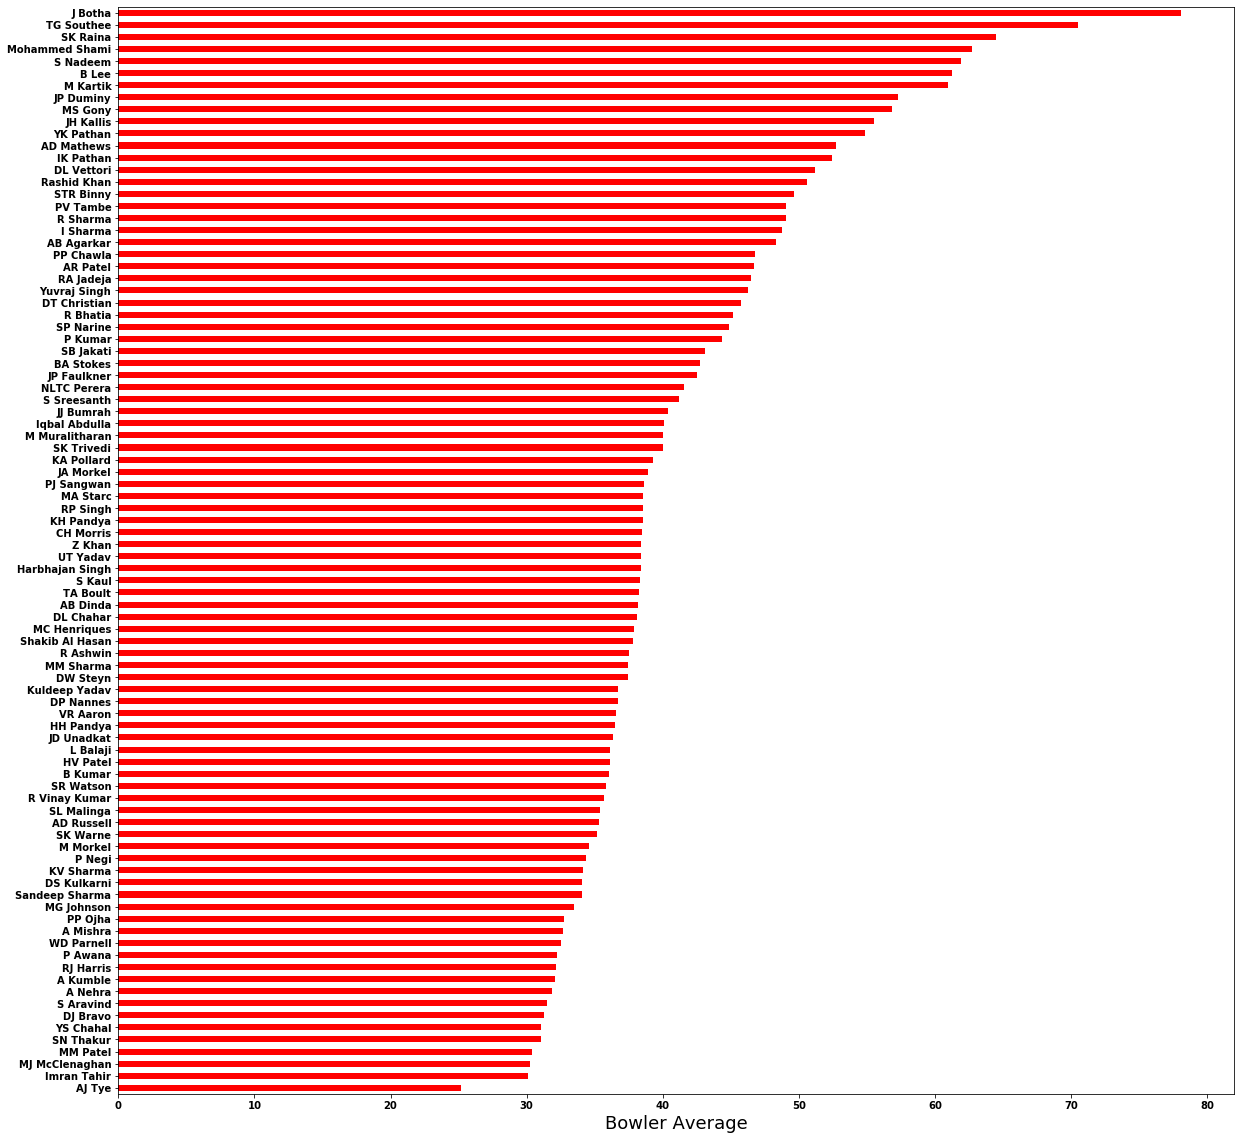

In [224]:
average=runs_b/wickets #average for a bowler
average.sort_values(ascending=True).plot(kind='barh',color='red',figsize=(20,20));
plt.xlabel('Bowler Average',fontsize=18)

In [185]:
#DJ Bravo has one of the least averages amongst the bowler with highest number of overs.
#While J Bumrah averages less than Rashid Khan

Text(0.5, 0, 'Extra Runs')

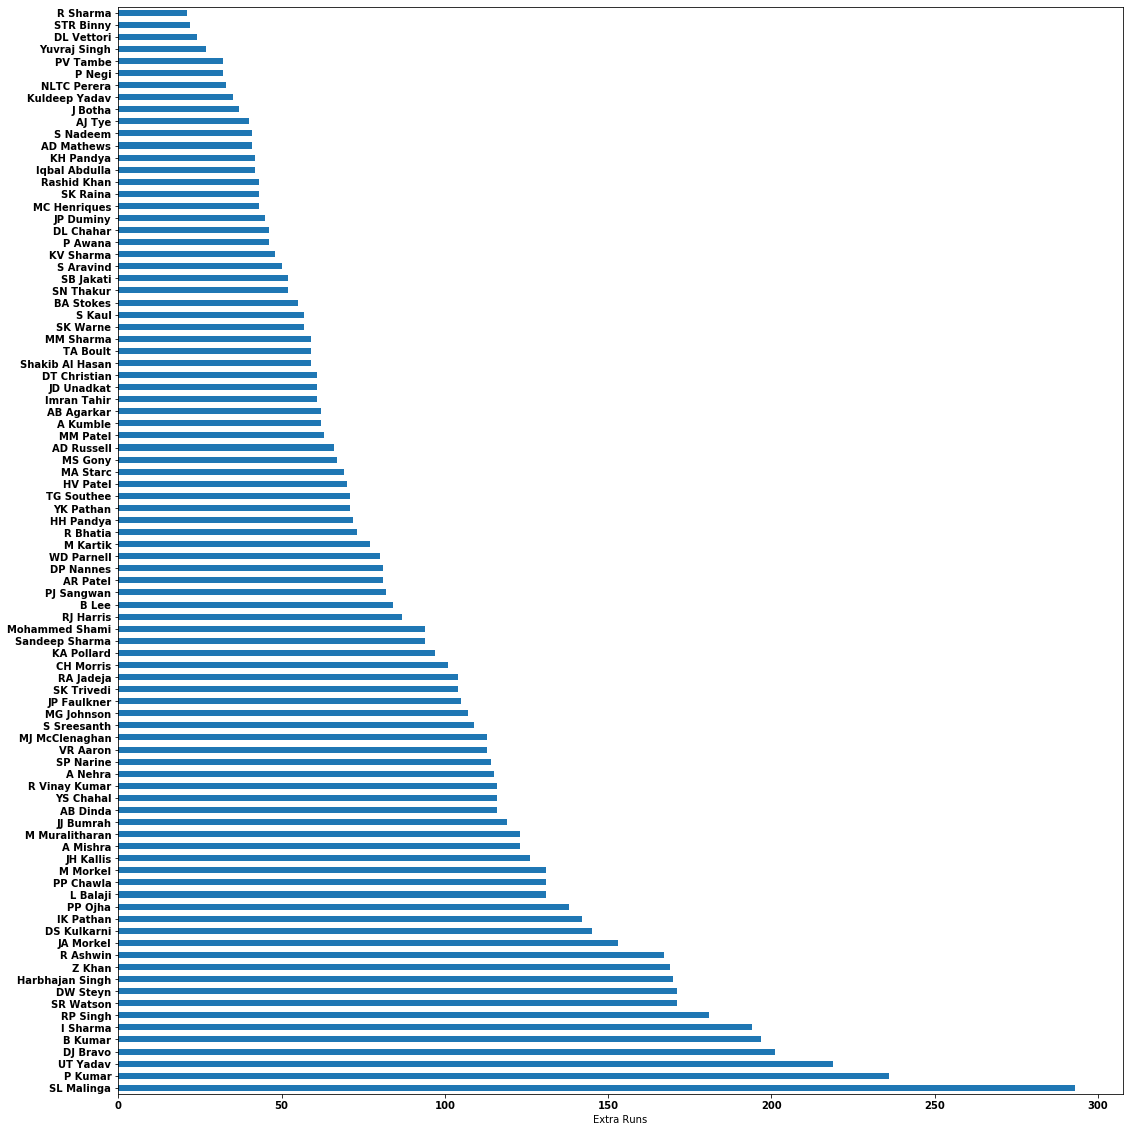

In [226]:
#extra runs conceded by a bowler
extra=ipl_d.groupby('bowler')['extra_runs'].sum()

extra=extra[bowl_100]
extra.sort_values(ascending=False).plot(kind='barh',figsize=(18,20))
plt.xlabel('Extra Runs')

In [227]:
#Rashid Khan has conceded one of the least extra runs.

## Boundaries: 

Text(0.5, 0, 'Number of fours')

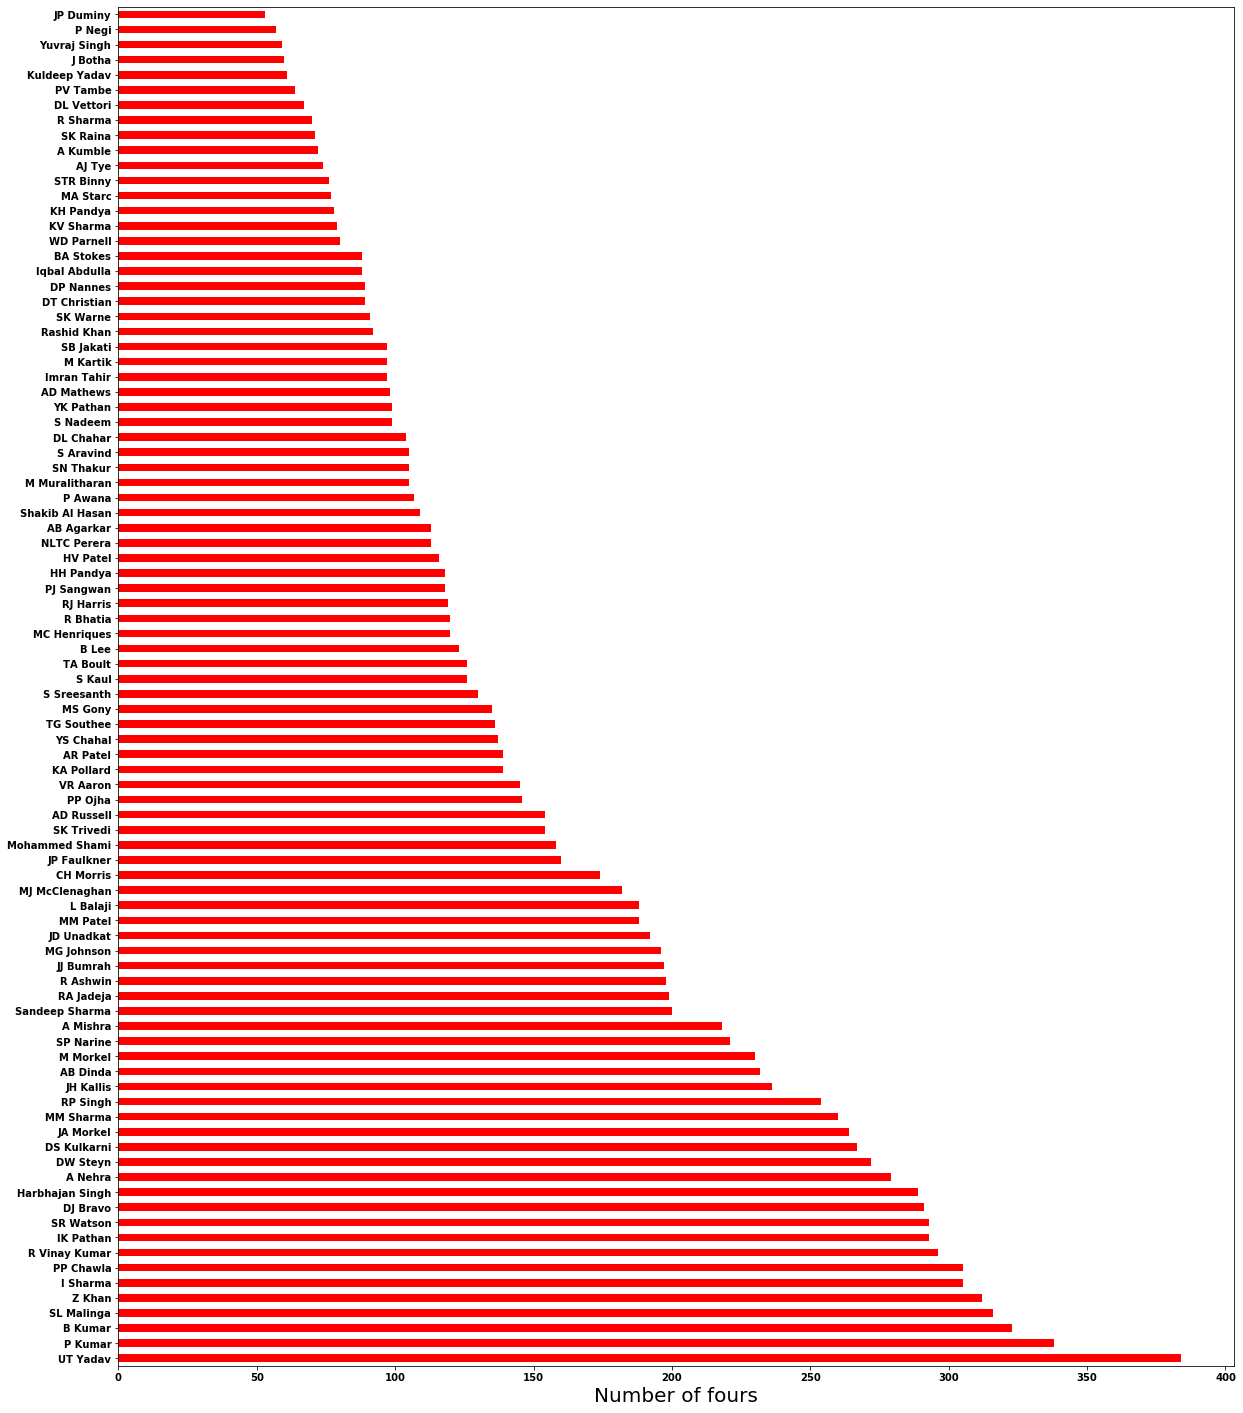

In [233]:
fours_bowl=ipl_fours.groupby('bowler')['batsman_runs'].sum()/4 #Number of fours conceded
bowl_4=(ipl_fours.groupby('bowler')['batsman_runs'].sum()/4)

bowl_4=bowl_4[bowl_100]
bowl_4.sort_values(ascending=False).plot(kind='barh',figsize=(20,25),color='red')
plt.xlabel('Number of fours',Fontsize=20)

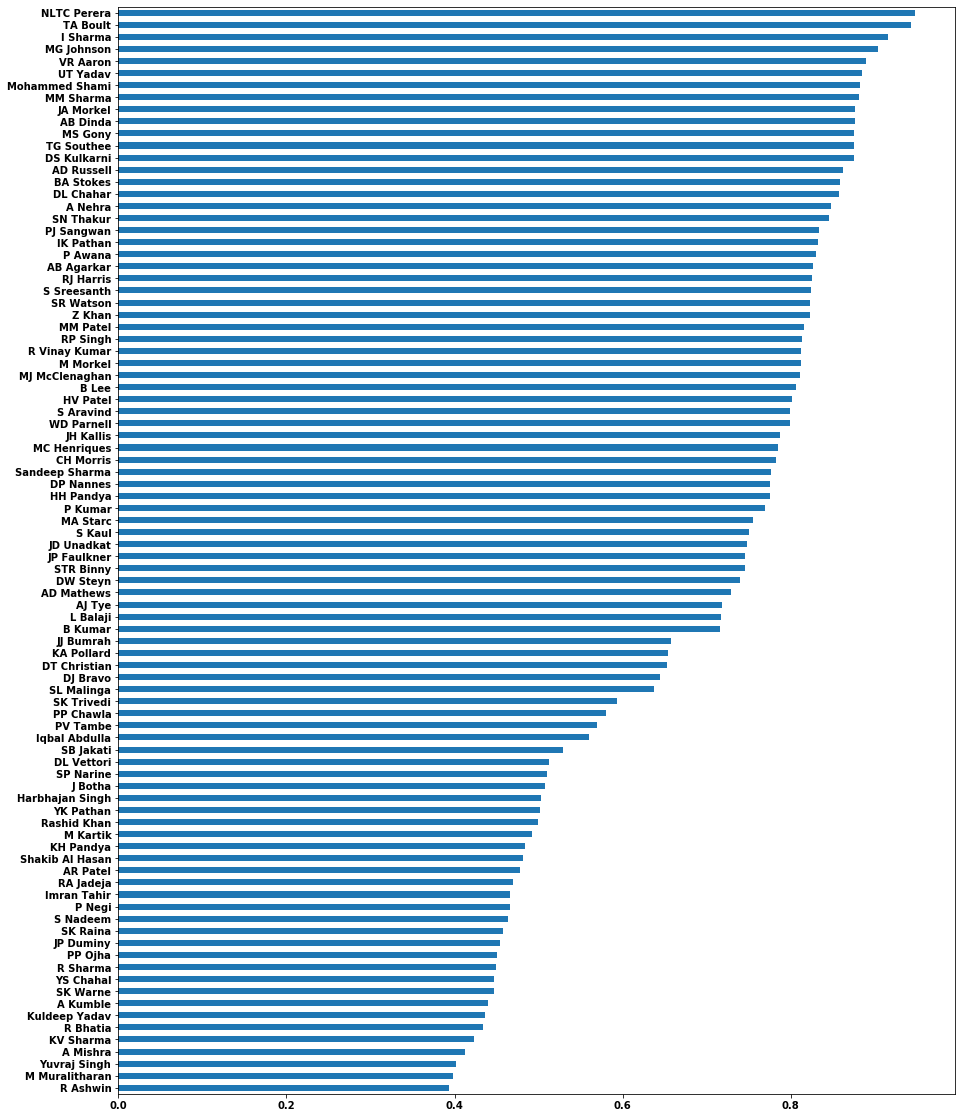

In [235]:
fours_per_over=bowl_4/overs_bowler
fours_per_over.sort_values(ascending=True).plot(kind='barh',figsize=(15,20));

In [236]:
#Amit Mishra has one of the least fours to overs ratio
#While Rashid Khan has less fours to overs ratio than Bumrah

In [237]:
bowl_sixes=pd.DataFrame(ipl_d[(ipl_d.batsman_runs == 6)]) #number of sixes conceded

Text(0.5, 0, 'Number of sixes conceded')

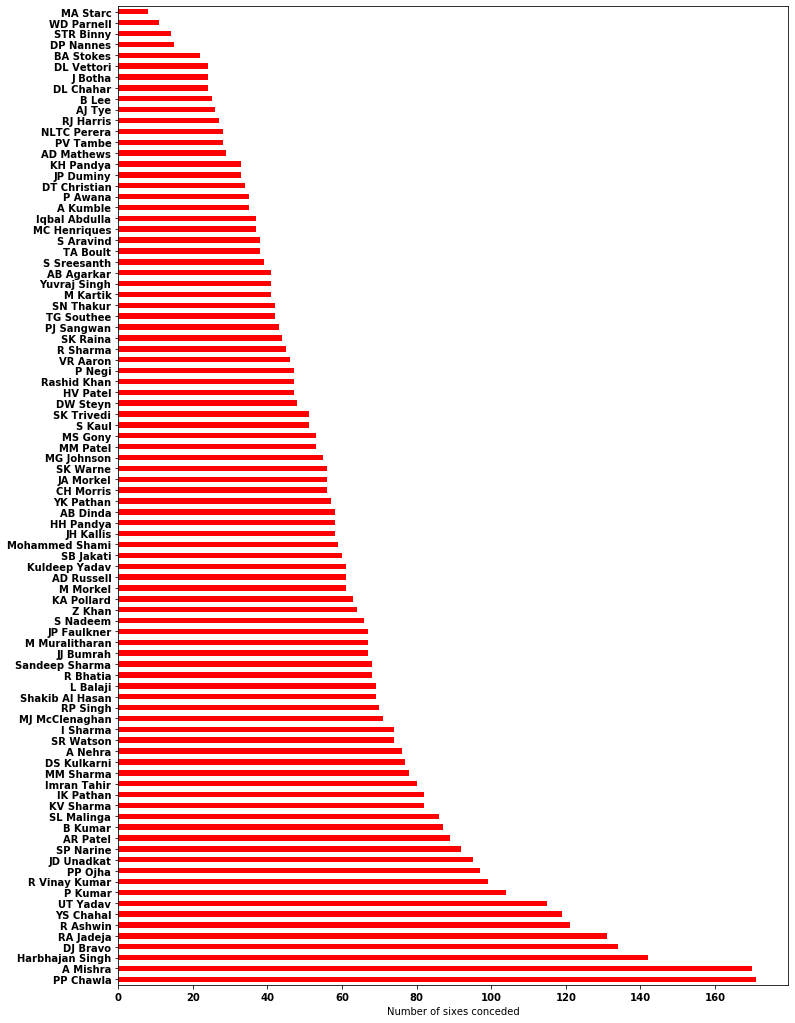

In [240]:
bowl_6=bowl_sixes.groupby('bowler')['batsman_runs'].sum()/6
bowl_6=bowl_6[bowl_100]
bowl_6.sort_values(ascending=False).plot(kind='barh',figsize=(12,18),color='red');
plt.xlabel('Number of sixes conceded')

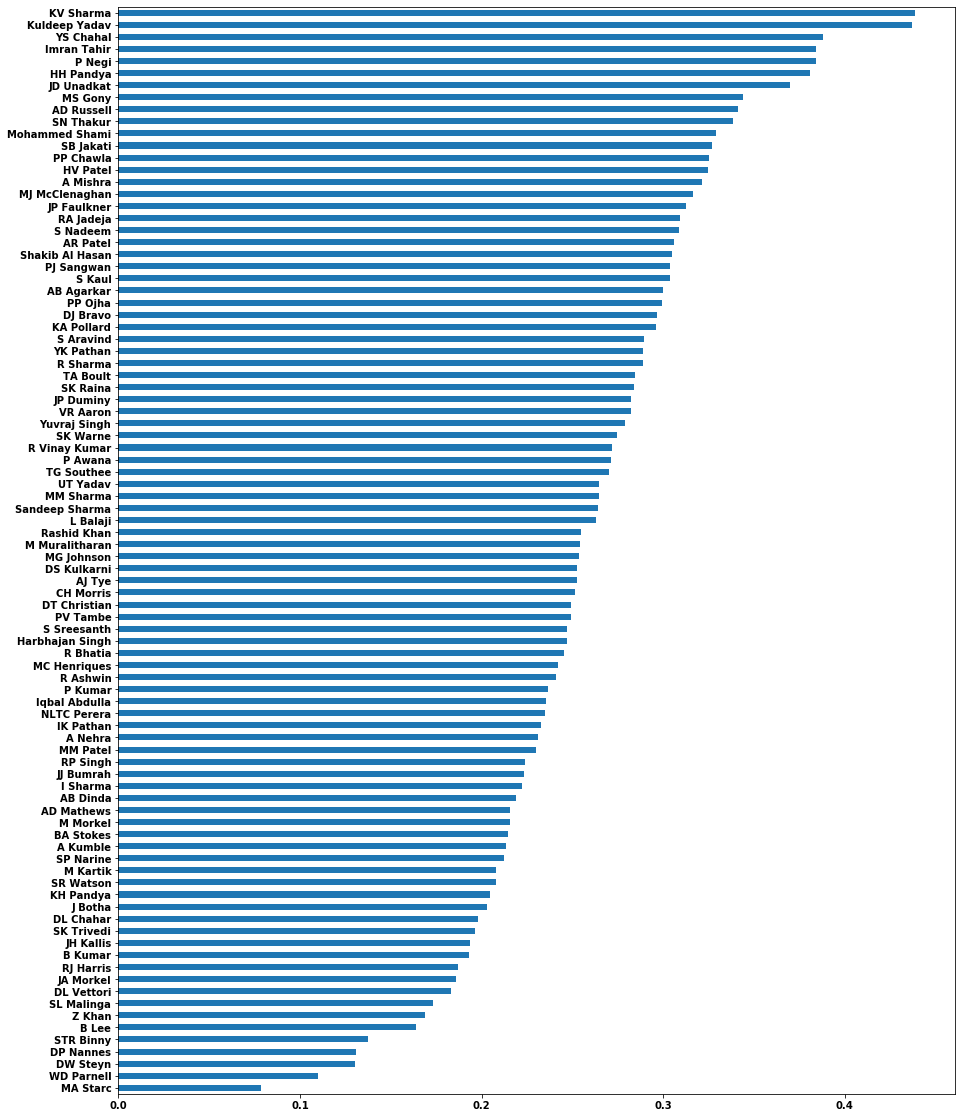

In [242]:
sixes_per_over=bowl_6/overs_bowler
sixes_per_over.sort_values(ascending=True).plot(kind='barh',figsize=(15,20));

In [ ]:
#J Bumrah has one of the least sixes to overs ratio.

## Observations:
### #Though Amit Mishra, PP Chawla, R Ashwin & DJ Bravo have bowled higest number of overs.
### While J Bumrah has bowled just more than 300 overs, Rashid Khan has bowled less than 200 overs.
### Though Amit Mishra, PP Chawla, R Ashwin & DJ Bravo have bowled higest number of overs.
### While J Bumrah has bowled just more than 300 overs, Rashid Khan has bowled less than 200 overs.
### Amit Mishra, DJ Bravo, PP Chawla & R Ashwin have taken highest wickets amongst current players.
### J Bumrah has higher number of wickets than Rashid Khan
### J Bumrah has bowled one of the highest number of deliveries in super over
### P Chawla, A Mishra & R Ashwin have conceded some of the highst runs.
### While R Khan has conceded less runs than Bumrah
### Economy of rashid Khan is least amongst all the considered options
### J Bumrah has one of the least sixes to overs ratio
### Amit Mishra has one of the least fours to overs ratio
### While Rashid Khan has less fours to overs ratio than Bumrah
### DJ Bravo has one of the least averages amongst the bowler with highest number of overs.
### While J Bumrah averages less than Rashid Khan
### Rashid Khan has conceded one of the least extra runs.

## Recommendation: Based on above observations, J Bumrah would be a better option for sponsors.